In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Загружаем данные

In [2]:
from sklearn.datasets import load_digits
digits = load_digits()
digits.keys()

['images', 'data', 'target_names', 'DESCR', 'target']

In [3]:
print digits.DESCR

 Optical Recognition of Handwritten Digits Data Set

Notes
-----
Data Set Characteristics:
    :Number of Instances: 5620
    :Number of Attributes: 64
    :Attribute Information: 8x8 image of integer pixels in the range 0..16.
    :Missing Attribute Values: None
    :Creator: E. Alpaydin (alpaydin '@' boun.edu.tr)
    :Date: July; 1998

This is a copy of the test set of the UCI ML hand-written digits datasets
http://archive.ics.uci.edu/ml/datasets/Optical+Recognition+of+Handwritten+Digits

The data set contains images of hand-written digits: 10 classes where
each class refers to a digit.

Preprocessing programs made available by NIST were used to extract
normalized bitmaps of handwritten digits from a preprinted form. From a
total of 43 people, 30 contributed to the training set and different 13
to the test set. 32x32 bitmaps are divided into nonoverlapping blocks of
4x4 and the number of on pixels are counted in each block. This generates
an input matrix of 8x8 where each element is 

In [3]:
digits.target_names

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [4]:
X = digits.data
y = digits.target
print(X.shape)
print(y.shape)

(1797L, 64L)
(1797L,)


In [8]:
N, d = X.shape

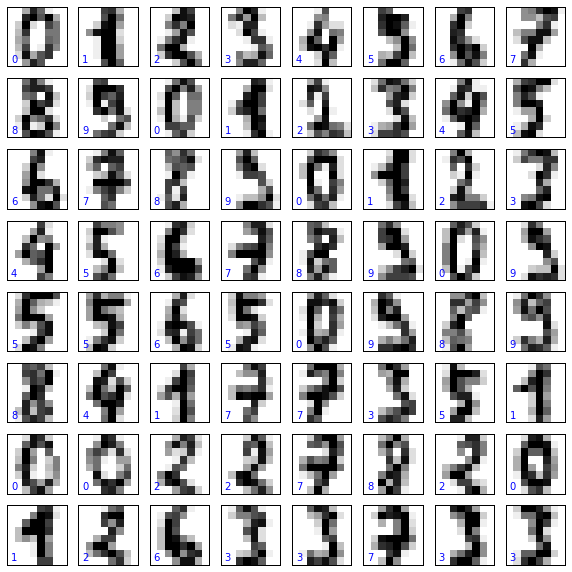

In [9]:
plt.figure(figsize = (10, 10)) # Размер окна в дюймах
for i in range(64):
    plt.subplot(8, 8, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(np.reshape(X[i, :], (8, 8)), interpolation = 'nearest')
    plt.text(0, 7, str(digits.target[i]), color = 'b')
    plt.set_cmap('binary')

In [6]:
X[0,:]

array([  0.,   0.,   5.,  13.,   9.,   1.,   0.,   0.,   0.,   0.,  13.,
        15.,  10.,  15.,   5.,   0.,   0.,   3.,  15.,   2.,   0.,  11.,
         8.,   0.,   0.,   4.,  12.,   0.,   0.,   8.,   8.,   0.,   0.,
         5.,   8.,   0.,   0.,   9.,   8.,   0.,   0.,   4.,  11.,   0.,
         1.,  12.,   7.,   0.,   0.,   2.,  14.,   5.,  10.,  12.,   0.,
         0.,   0.,   0.,   6.,  13.,  10.,   0.,   0.,   0.])

In [10]:
from sklearn import neighbors
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, 
                                                    random_state = 7)
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)
y_test_pred = model.predict(X_test)

N_test = X_test.shape[0]
print N_test

594


In [11]:
from sklearn import metrics
print 1 - metrics.accuracy_score(y_test, y_test_pred)
print np.mean(y_test != y_test_pred)

0.013468013468
0.013468013468


In [12]:
print metrics.confusion_matrix(y_test, y_test_pred)

[[63  0  0  0  0  0  0  0  0  0]
 [ 0 57  0  0  0  0  0  0  0  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0 56  0  0  0  1  0  0]
 [ 0  0  0  0 63  0  0  1  0  0]
 [ 0  0  0  0  0 51  0  0  0  0]
 [ 0  0  0  0  0  0 56  0  0  0]
 [ 0  0  0  0  0  0  0 58  0  0]
 [ 0  1  0  1  0  0  0  0 67  0]
 [ 0  1  0  2  0  1  0  0  0 58]]


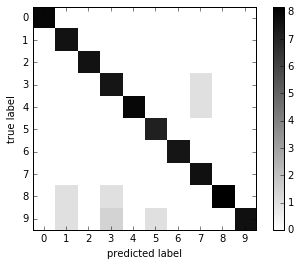

In [13]:
M = metrics.confusion_matrix(y_test, y_test_pred)
#M = M - np.diag(np.diag(M))
M = np.sqrt(M)
plt.imshow(M, interpolation = 'nearest')
plt.set_cmap('binary')
plt.grid(False)
plt.xticks(range(10))
plt.yticks(range(10))
plt.xlabel("predicted label")
plt.ylabel("true label")
plt.colorbar()

In [14]:
kk = range(1, 30, 2)
err_train = []
err_test = []
for k in kk:
    model = neighbors.KNeighborsClassifier(n_neighbors = k)
    model.fit(X_train, y_train)
    err_train.append(np.mean(model.predict(X_train) != y_train))
    err_test.append(np.mean(model.predict(X_test) != y_test))

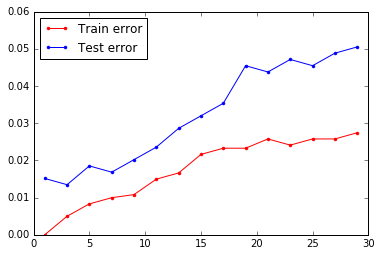

In [15]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 2)
#plt.gca().set_xscale('log')

In [18]:
print min(err_test)
print kk[err_test.index(min(err_test))]

0.013468013468
3


(30, 0)

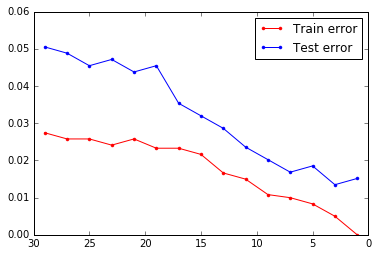

In [19]:
plt.plot(kk, err_train, '.-r', label = 'Train error')
plt.plot(kk, err_test,  '.-b', label = 'Test error')    
plt.legend(loc = 1)
plt.xlim([30, 0])

C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda\lib\site-packages\sklearn

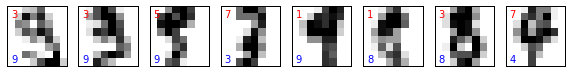

In [20]:
model = neighbors.KNeighborsClassifier(n_neighbors = 3)
model.fit(X_train, y_train)

plt.figure(figsize = (10, 10)) # Размер окна в дюймах
i_subplot = 1 
for i in range(N_test):
    yi_test_pred = model.predict(X_test[i, :])[0]
    if yi_test_pred != y_test[i]:
        plt.subplot(8, 8, i_subplot)
        i_subplot += 1
        plt.xticks([])
        plt.yticks([])
        plt.imshow(np.reshape(X_test[i, :], (8, 8)), cmap = plt.cm.binary, 
                   interpolation = 'nearest')
        plt.text(0, 7, str(y_test[i]),    color = 'b')        
        plt.text(0, 1, str(yi_test_pred), color = 'r')

## Плюсы и минусы метода $k$NN

**Плюсы**

* Простой метод
* Для ряда задач показывает неплохие результаты (как, например, в задаче распознавания рукописных цифр)
* Достаточно устойчив к выбросам (при подходящем выборе $k$)
* Работает как с числовыми, так и номинальными признаками

**Минусы**

* Сколько соседей брать?
* Какую метрику использовать?
* Необходимо хранить всю выборку
* Слишком медленный (но можно использовать ускоренные алгоритмы, например, kd-деревья и т.д.)
* Подвержен проклятию размерности

# Bonus: Понижение размерности

## PCA

In [28]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
pca.fit(X)
X_pca = pca.transform(X) # или сразу pca.fit_transform(X)
X_pca.shape

(1797L, 2L)

In [29]:
def draw_proj_digits(X, y):
    for i in range(X.shape[0]):
        plt.text(X[i, 0], X[i, 1], str(digits.target[i]),
                 color=plt.cm.Set1(y[i] / 10.),
                 fontdict={'weight': 'bold', 'size': 9})

#draw_proj_digits(X_reduced, digits.target) # Никогда не запускайте эту функцию! 

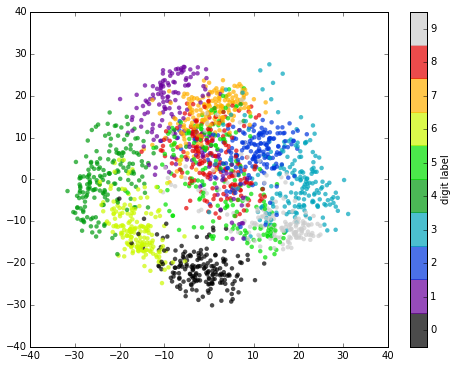

In [37]:
plt.figure(figsize = (8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = digits.target, 
            edgecolor = 'none', alpha = .7)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

## Isomap

In [38]:
from sklearn.manifold import Isomap

In [46]:
iso = Isomap(n_components = 2)
iso.fit(X)
X_iso = iso.transform(X)

In [42]:
X_iso.shape

(1797L, 2L)

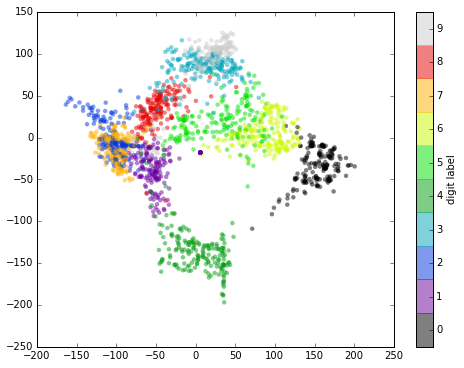

In [45]:
plt.figure(figsize = (8, 6))
plt.scatter(X_iso[:, 0], X_iso[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

## Случайная проекция

In [49]:
from sklearn import random_projection
rp = random_projection.SparseRandomProjection(n_components = 2, random_state = 41)
rp.fit(X)
X_rp = rp.transform(X)

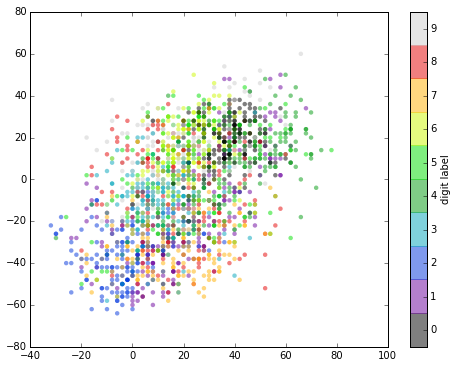

In [50]:
plt.figure(figsize = (8, 6))
plt.scatter(X_rp[:, 0], X_rp[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)

## LDA

In [52]:
from sklearn import lda
mlda = lda.LDA(n_components = 2)
mlda.fit(X, y)
X_lda = mlda.transform(X)

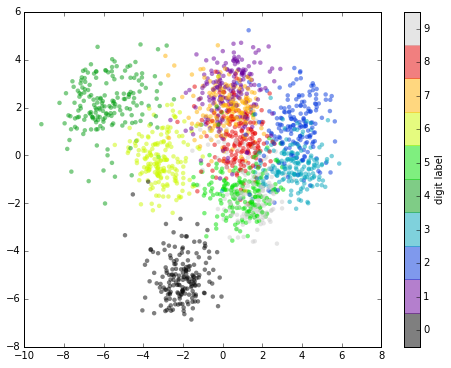

In [53]:
plt.figure(figsize = (8, 6))
plt.scatter(X_lda[:, 0], X_lda[:, 1], c = digits.target, edgecolor = 'none', alpha = 0.5)
plt.set_cmap(plt.cm.get_cmap('nipy_spectral', 10))
plt.colorbar(label = 'digit label', ticks = range(10))
plt.clim(-0.5, 9.5)